<a href="https://colab.research.google.com/github/msaad1311/Bus-route-delay-in-Toronto/blob/master/MSCI623_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import calendar
import holidays
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB 

In [0]:
df=pd.read_excel("bus_data_new1.xlsx")


In [0]:
df.head()

,Report Date,Route,Time,Day,Incident ID,Incident,Delay,Gap,Direction,Vehicle
0,2019-04-30,34,03:00:00,Tuesday,6,Emergency Services,1.0,1.0,EB,8840.0
1,2019-04-30,91,05:00:00,Tuesday,3,Diversion,1.0,1.0,B/W,8950.0
2,2019-04-30,67,05:37:00,Tuesday,1,Mechanical,1.0,1.0,N/B,8774.0
3,2019-04-30,67,05:37:00,Tuesday,11,Late Leaving Garage - Mechanical,1.0,1.0,N/B,8774.0
4,2019-04-30,120,05:53:00,Tuesday,1,Mechanical,1.0,1.0,S/B,3265.0


**Adding all the delays together on the basis of the dates**

In [0]:
df= df.groupby(by='Report Date').agg({'Delay': 'sum'}).reset_index()

In [0]:
df.head()

,Report Date,Delay
0,2014-01-01,2369.0
1,2014-01-02,4960.0
2,2014-01-03,6077.0
3,2014-01-04,3428.0
4,2014-01-05,2875.0


Plotting the distribution of delay against report date

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


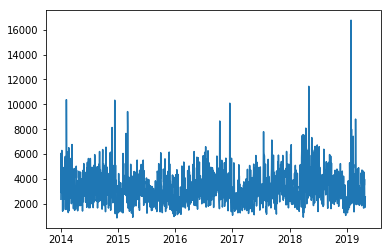

In [0]:
plt.plot(df["Report Date"],df["Delay"])
plt.show()

In [0]:
weather = pd.read_excel("weather data.xlsx")

In [0]:
weather.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2019-04-29,2019,4,29,NaN,7.0,NaN,-0.6,NaN,3.2,NaN,14.8,NaN,0.0,NaN,0.6,NaN,0.2,NaN,0.8,NaN,NaN,NaN,11.0,NaN,48.0,NaN
1,2019-04-28,2019,4,28,NaN,10.5,NaN,1.7,NaN,6.1,NaN,11.9,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,32.0,NaN,54.0,NaN
2,2019-04-27,2019,4,27,NaN,8.0,NaN,1.0,NaN,4.5,NaN,13.5,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,30.0,NaN,72.0,NaN
3,2019-04-26,2019,4,26,NaN,13.0,NaN,3.1,NaN,8.1,NaN,9.9,NaN,0.0,NaN,18.0,NaN,0.0,NaN,18.0,NaN,NaN,NaN,30.0,NaN,74.0,NaN
4,2019-04-25,2019,4,25,NaN,12.9,NaN,2.2,NaN,7.6,NaN,10.4,NaN,0.0,NaN,0.8,NaN,0.0,NaN,0.8,NaN,NaN,NaN,NaN,M,NaN,M


Renaming the column name of Weather so that clubbing can be done in accordance to the df variable

In [0]:
weather.rename(columns={"Date/Time":"Report Date"},inplace=True)

In [0]:
weather.columns
len(weather)

1945

In [0]:
main_data= pd.merge(df,weather,on="Report Date")

In [0]:
main_data.head()

,Report Date,Delay,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2014-01-01,2369.0,2014,1,1,NaN,-10.0,NaN,-15.3,NaN,-12.7,NaN,30.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,NaN,27.0,NaN,35.0,NaN
1,2014-01-02,4960.0,2014,1,2,NaN,-15.2,NaN,-20.0,NaN,-17.6,NaN,35.6,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.8,NaN,3.0,NaN,35.0,NaN,48.0,NaN
2,2014-01-03,6077.0,2014,1,3,NaN,-9.2,NaN,-23.8,NaN,-16.5,NaN,34.5,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,4.0,NaN,21.0,NaN,41.0,NaN
3,2014-01-04,3428.0,2014,1,4,NaN,-0.4,NaN,-9.2,NaN,-4.8,NaN,22.8,NaN,0.0,NaN,0.0,NaN,0.4,NaN,0.4,NaN,4.0,NaN,23.0,NaN,57.0,NaN
4,2014-01-05,2875.0,2014,1,5,NaN,-0.1,NaN,-2.6,NaN,-1.4,NaN,19.4,NaN,0.0,NaN,1.8,NaN,11.6,NaN,14.4,NaN,6.0,NaN,NaN,NaN,30.0,NaN


In [0]:
main_data=main_data.drop(columns=['Year', 'Month', 'Data Quality',
       'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag','Mean Temp Flag', 'Heat Deg Days (°C)',
       'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag',
       'Total Rain Flag','Total Snow Flag', 'Total Precip Flag',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag','Spd of Max Gust Flag','Day'])

In [0]:
main_data.head()


,Report Date,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h)
0,2014-01-01,2369.0,-12.7,0.0,0.0,0.0,3.0,35.0
1,2014-01-02,4960.0,-17.6,0.0,1.0,0.8,3.0,48.0
2,2014-01-03,6077.0,-16.5,0.0,0.0,0.0,4.0,41.0
3,2014-01-04,3428.0,-4.8,0.0,0.4,0.4,4.0,57.0
4,2014-01-05,2875.0,-1.4,1.8,11.6,14.4,6.0,30.0


Plotting of each variable againt the other variables

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


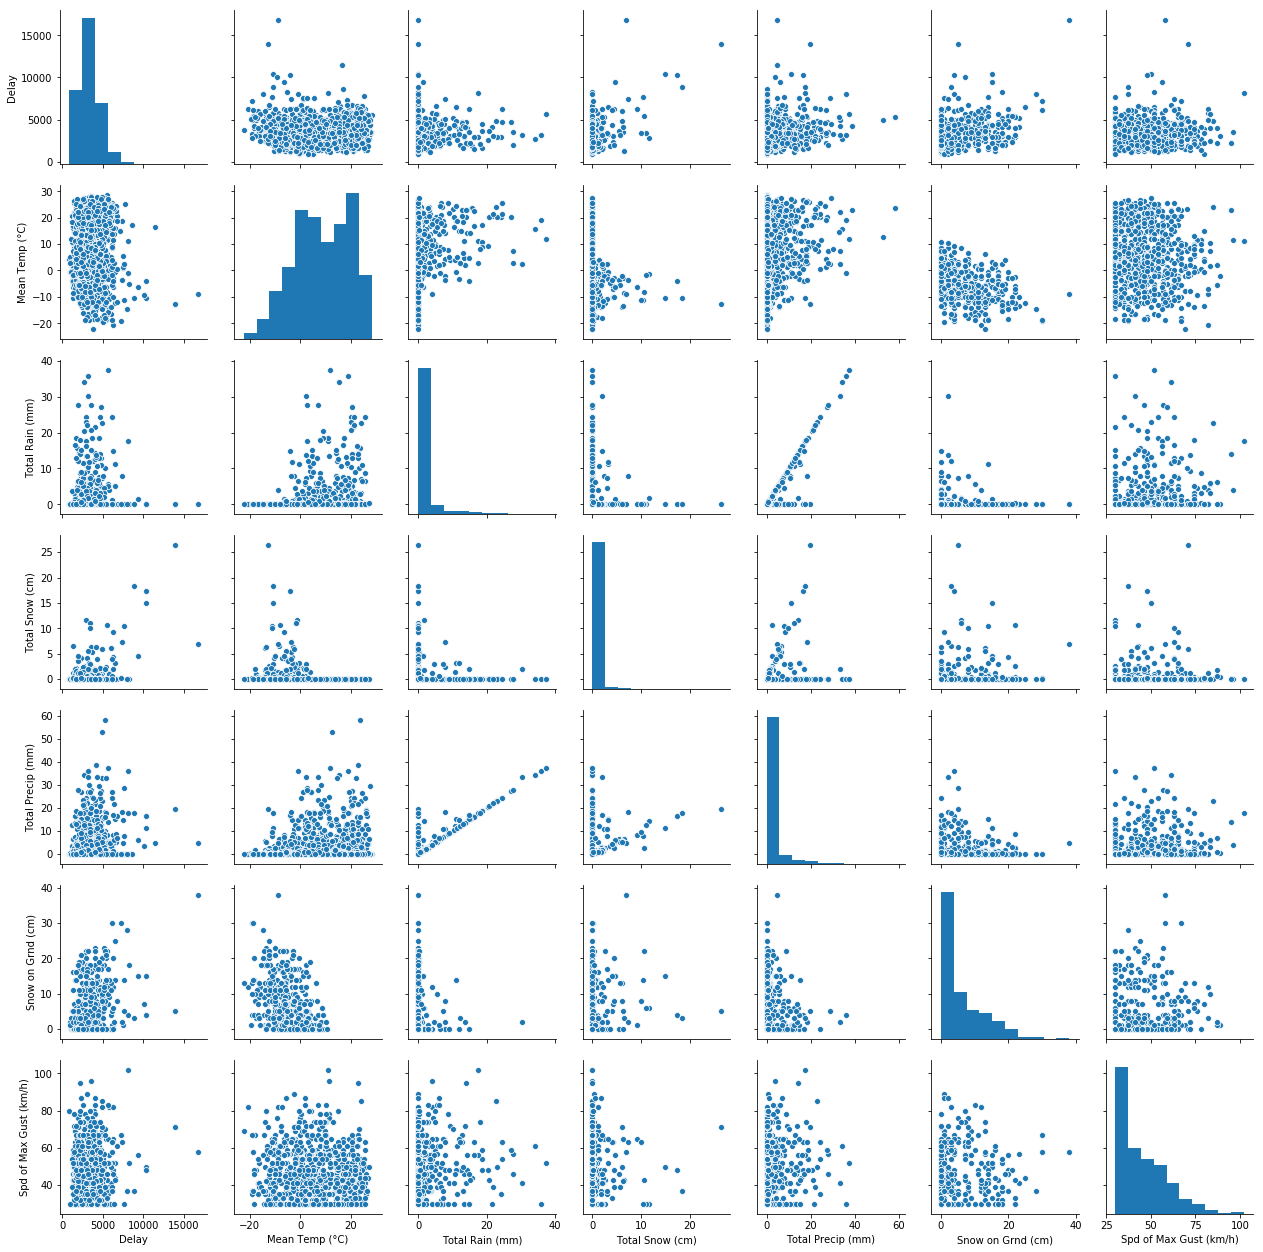

In [0]:

sns.pairplot(main_data)

Adding a column of Day so that type of the day can be determined

In [0]:
main_data["Day"]=np.arange(len(main_data))
for i in range (len(main_data)):
  main_data["Day"][i]=calendar.day_name[main_data["Report Date"][i].weekday()]
main_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Report Date,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Day
0,2014-01-01,2369.0,-12.7,0.0,0.0,0.0,3.0,35.0,Wednesday
1,2014-01-02,4960.0,-17.6,0.0,1.0,0.8,3.0,48.0,Thursday
2,2014-01-03,6077.0,-16.5,0.0,0.0,0.0,4.0,41.0,Friday
3,2014-01-04,3428.0,-4.8,0.0,0.4,0.4,4.0,57.0,Saturday
4,2014-01-05,2875.0,-1.4,1.8,11.6,14.4,6.0,30.0,Sunday


Adding the column to determine whether it is the weekday or weekend

In [0]:
main_data["Type of the Day"]=np.arange(len(main_data))
for i in range (len(main_data)):
  if main_data["Day"][i]=="Sunday"or main_data["Day"][i]=="Saturday":
    main_data["Type of the Day"][i]=0
  else:
    main_data["Type of the Day"][i]=1

main_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Report Date,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Day,Type of the Day
0,2014-01-01,2369.0,-12.7,0.0,0.0,0.0,3.0,35.0,Wednesday,1
1,2014-01-02,4960.0,-17.6,0.0,1.0,0.8,3.0,48.0,Thursday,1
2,2014-01-03,6077.0,-16.5,0.0,0.0,0.0,4.0,41.0,Friday,1
3,2014-01-04,3428.0,-4.8,0.0,0.4,0.4,4.0,57.0,Saturday,0
4,2014-01-05,2875.0,-1.4,1.8,11.6,14.4,6.0,30.0,Sunday,0


Making a list contaning all the public holidays of Canada Ontario 

In [0]:
can_holiday= holidays.CountryHoliday("CA",prov="ON")

Determine the public holiday on the basis of the list 

In [0]:
main_data["Public Holiday"]=np.arange(len(main_data))
for i in range(len(main_data)):
  if main_data["Report Date"][i] in can_holiday:
    main_data["Public Holiday"][i]=1
  else:
    main_data["Public Holiday"][i]=0
main_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Report Date,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Day,Type of the Day,Public Holiday
0,2014-01-01,2369.0,-12.7,0.0,0.0,0.0,3.0,35.0,Wednesday,1,1
1,2014-01-02,4960.0,-17.6,0.0,1.0,0.8,3.0,48.0,Thursday,1,0
2,2014-01-03,6077.0,-16.5,0.0,0.0,0.0,4.0,41.0,Friday,1,0
3,2014-01-04,3428.0,-4.8,0.0,0.4,0.4,4.0,57.0,Saturday,0,0
4,2014-01-05,2875.0,-1.4,1.8,11.6,14.4,6.0,30.0,Sunday,0,0


Determining the missing enteries and quantum of those missing data

In [0]:
for i in main_data.columns:
  print(i," : ",main_data[i].isnull().any(),":",main_data[i].isnull().sum())

Report Date  :  False : 0
Delay  :  False : 0
Mean Temp (°C)  :  True : 40
Total Rain (mm)  :  True : 1103
Total Snow (cm)  :  True : 1099
Total Precip (mm)  :  True : 92
Snow on Grnd (cm)  :  True : 1452
Spd of Max Gust (km/h)  :  True : 1111
Day  :  False : 0
Type of the Day  :  False : 0
Public Holiday  :  False : 0


Performing the interpolation on the missing entry columns since there the weather undergoes a linear expression rather than a polynomial expression. For instance, the odds of having a temperature of 40 on one day and -6 on the next day is not possible. 

In [0]:
for i in main_data.columns:
  if main_data[i].isnull().any()== True:
    main_data[i]=main_data[i].interpolate(limit_direction="both") #direction is set to both so that in case the missing entries is both in continous form in the start or the end then interpolation can be done. Otherwise the interpolation will fail
    print("Interpolation of",i,"Completed")

Interpolation of Mean Temp (°C) Completed
Interpolation of Total Rain (mm) Completed
Interpolation of Total Snow (cm) Completed
Interpolation of Total Precip (mm) Completed
Interpolation of Snow on Grnd (cm) Completed
Interpolation of Spd of Max Gust (km/h) Completed


Validation of the interpolation

In [0]:
for i in main_data.columns:
  print(i," : ",main_data[i].isnull().any(),":",main_data[i].isnull().sum())

Report Date  :  False : 0
Delay  :  False : 0
Mean Temp (°C)  :  False : 0
Total Rain (mm)  :  False : 0
Total Snow (cm)  :  False : 0
Total Precip (mm)  :  False : 0
Snow on Grnd (cm)  :  False : 0
Spd of Max Gust (km/h)  :  False : 0
Day  :  False : 0
Type of the Day  :  False : 0
Public Holiday  :  False : 0


Description of the variables before normalization

In [0]:
main_data.describe()

,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Type of the Day,Public Holiday
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000
mean,3369.655013,8.679383,0.958149,0.165913,2.094859,2.615424,50.022365,0.714139,0.029306
std,1326.696359,10.986685,3.175012,1.206645,5.225339,4.412190,10.176428,0.451940,0.168706
min,867.000000,-22.300000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,2454.000000,0.700000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000
50%,3199.000000,8.600000,0.326892,0.000000,0.000000,0.793103,52.523245,1.000000,0.000000
75%,4066.000000,18.500000,0.494622,0.000000,1.400000,3.000000,55.812215,1.000000,0.000000
max,16754.000000,28.500000,37.400000,26.400000,58.200000,38.000000,102.000000,1.000000,1.000000


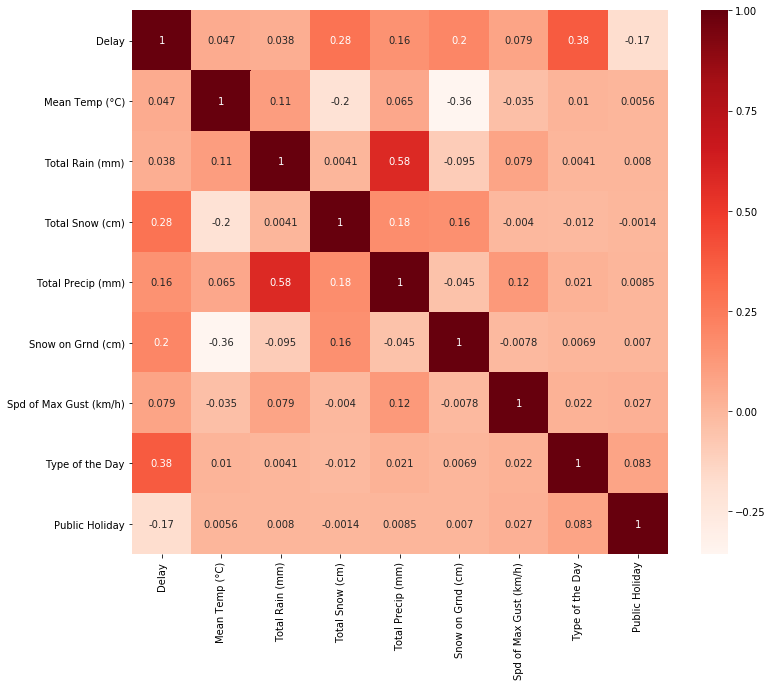

In [0]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = main_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Normalizing the data from 0-1

In [0]:
scalar = MinMaxScaler()

main_data[['Mean Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)',
       'Spd of Max Gust (km/h)','Snow on Grnd (cm)']]=scalar.fit_transform(main_data[['Mean Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)',
       'Spd of Max Gust (km/h)','Snow on Grnd (cm)']])

main_data.describe()

,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Type of the Day,Public Holiday
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000
mean,3369.655013,0.609830,0.025619,0.006285,0.035994,0.068827,0.278088,0.714139,0.029306
std,1326.696359,0.216273,0.084893,0.045706,0.089782,0.116110,0.141339,0.451940,0.168706
min,867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2454.000000,0.452756,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000
50%,3199.000000,0.608268,0.008740,0.000000,0.000000,0.020871,0.312823,1.000000,0.000000
75%,4066.000000,0.803150,0.013225,0.000000,0.024055,0.078947,0.358503,1.000000,0.000000
max,16754.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the data in 80/20 split

In [0]:
x=main_data[['Mean Temp (°C)','Spd of Max Gust (km/h)','Total Snow (cm)','Type of the Day','Total Precip (mm)','Total Rain (mm)','Public Holiday','Snow on Grnd (cm)']]


y=main_data['Delay']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=43)

Creating the regressors

In [0]:
#Linear Regression
clf_regression= LinearRegression().fit(x,y)
ypred = clf_regression.predict(xtest)
print("The score of the regressor is:",np.average(cross_val_score(clf_regression,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_regression.predict(xtest)))

The score of the regressor is: 23.322021797028434
The Mean Square error is: 1223251.7441825424


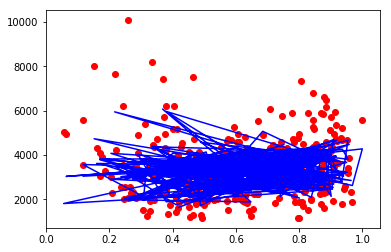

In [0]:
#Plotting the predicted and actual values
y_pred=clf_regression.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#SVR
clf_svr=SVR(kernel="poly",degree=11,gamma="scale")

clf_svr.fit(x,y)


print("The score of the regressor is:",np.average(cross_val_score(clf_svr,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_svr.predict(xtest)))

The score of the regressor is: 8.156451840019194
The Mean Square error is: 1313509.200247132


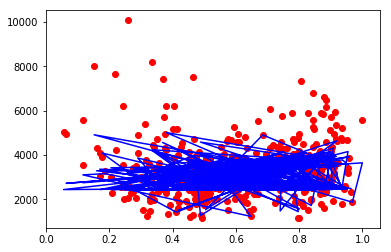

In [0]:
#Plotting the predicted and actual values
y_pred=clf_svr.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#SGD Regressor
clf_SGD = linear_model.SGDRegressor(max_iter=10000, tol=1e-3)
clf_SGD.fit(x,y)

print("The score of the regressor is:",np.average(cross_val_score(clf_SGD,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_SGD.predict(xtest)))

The score of the regressor is: 20.381566685327794
The Mean Square error is: 1261770.467933501


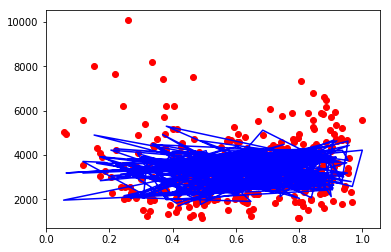

In [0]:
#Plotting the predicted and actual values
y_pred=clf_SGD.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#Ridge Regressor
clf_ridge = Ridge()

clf_ridge.fit(x, y)

print("The score of the regressor is:",np.average(cross_val_score(clf_ridge,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_ridge.predict(xtest)))

The score of the regressor is: 23.332489031262586
The Mean Square error is: 1232971.500986483


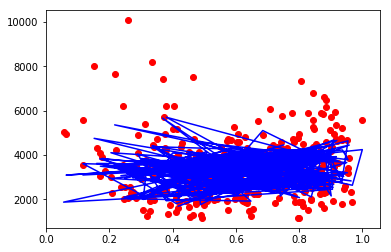

In [0]:
#Plotting the predicted and actual values
y_pred=clf_ridge.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#Knearest Neighbor Regressor
clf_knr = KNeighborsRegressor(n_neighbors=65)
clf_knr.fit(x, y) 

print("The score of the regressor is:", np.average(cross_val_score(clf_knr,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_knr.predict(xtest)))

The score of the regressor is: 15.551485162405736
The Mean Square error is: 1223208.5077014344


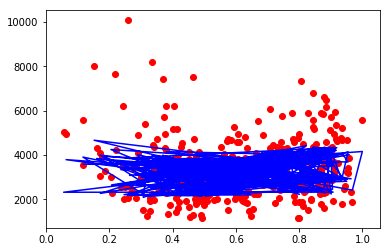

In [0]:
#Plotting the predicted and actual values
y_pred=clf_knr.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#Random forest regressor
clf_rfr = RandomForestRegressor()
clf_rfr.fit(x, y)  

print("The score of the regressor is:",np.average(cross_val_score(clf_rfr,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_rfr.predict(xtest)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The score of the regressor is: 16.718775740431397
The Mean Square error is: 208253.71881748072


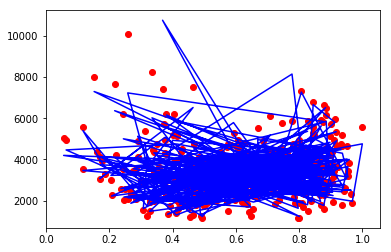

In [0]:
#Plotting the predicted and actual values
y_pred=clf_rfr.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#AdaBoost Regressor
clf_ada = AdaBoostRegressor()
clf_ada.fit(x,y) 

#print(clf_ada.feature_importances_)
print("The score of the regressor is:",np.average(cross_val_score(clf_ada,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_ada.predict(xtest)))

The score of the regressor is: 5.4361470956679385
The Mean Square error is: 1386414.4456873026


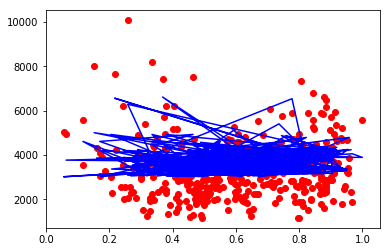

In [0]:
#Plotting the predicted and actual values
y_pred=clf_ada.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#Decision Tree regressor
clf_dtr = DecisionTreeRegressor(max_depth=4)
clf_dtr.fit(x,y)

print("The score of the regressor is:",np.average(cross_val_score(clf_dtr,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_dtr.predict(xtest)))

The score of the regressor is: 12.308215661090625
The Mean Square error is: 1249766.8997694475


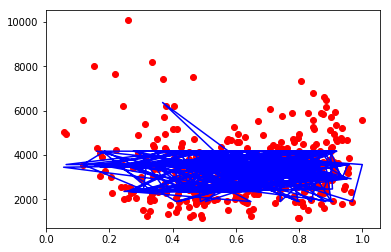

In [0]:
#Plotting the predicted and actual values
y_pred=clf_dtr.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


In [0]:
#bayesian regressor
clf_br = linear_model.BayesianRidge()
clf_br.fit(x,y)

print("The score of the regressor is:", np.average(cross_val_score(clf_br,x,y,cv=5))*100)
print("The Mean Square error is:",mean_squared_error(ytest,clf_br.predict(xtest)))

The score of the regressor is: 23.332438815693557
The Mean Square error is: 1224579.984335472


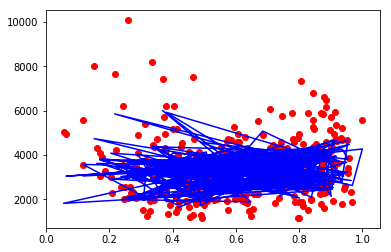

In [0]:
#Plotting the predicted and actual values
y_pred=clf_br.predict(xtest)

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})

plt.scatter(xtest.iloc[:,0].values,ytest,color="r")
plt.plot(xtest.iloc[:,0].values,y_pred,color='b')
plt.show()


Classifier (4 classes)

In [0]:
main_data["Delay"].describe()

count     1945.000000
mean      3369.655013
std       1326.696359
min        867.000000
25%       2454.000000
50%       3199.000000
75%       4066.000000
max      16754.000000
Name: Delay, dtype: float64

In [0]:
main_data["Type of Delay"]=np.arange(len(main_data))

for i in range(len(main_data)):
  if main_data["Delay"][i]>=867.0 and main_data["Delay"][i]<=2454.0:
    main_data["Type of Delay"][i]=1
  elif main_data["Delay"][i]>=2455.0 and main_data["Delay"][i]<=3199.0:
    main_data["Type of Delay"][i]=2
  elif main_data["Delay"][i]>=3200.0 and main_data["Delay"][i]<=4066.0:
    main_data["Type of Delay"][i]=3
  else:
    main_data["Type of Delay"][i]=4
    
main_data.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingW

,Report Date,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Day,Type of the Day,Public Holiday,Type of Delay
0,2014-01-01,2369.0,0.188976,0.000000,0.000000,0.000000,0.078947,0.069444,Wednesday,1,1,1
1,2014-01-02,4960.0,0.092520,0.000000,0.037879,0.013746,0.078947,0.250000,Thursday,1,0,4
2,2014-01-03,6077.0,0.114173,0.000000,0.000000,0.000000,0.105263,0.152778,Friday,1,0,4
3,2014-01-04,3428.0,0.344488,0.000000,0.015152,0.006873,0.105263,0.375000,Saturday,0,0,3
4,2014-01-05,2875.0,0.411417,0.048128,0.439394,0.247423,0.157895,0.000000,Sunday,0,0,2


Verifying the class imbalance

In [0]:
print((main_data["Type of Delay"]==1).sum())
print((main_data["Type of Delay"]==2).sum())
print((main_data["Type of Delay"]==3).sum())
print((main_data["Type of Delay"]==4).sum())

487
487
486
485


Splitting the data on 80/20

In [0]:
x=main_data[['Mean Temp (°C)','Spd of Max Gust (km/h)','Total Snow (cm)','Type of the Day','Total Precip (mm)','Total Rain (mm)','Public Holiday','Snow on Grnd (cm)']]
y = main_data["Type of Delay"]
  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42) 

Creating the classifiers

In [0]:
#Decision tree
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x, y) 
dtree_predictions = dtree_model.predict(X_test) 

print("The accuracy of the classfier is:",np.average(cross_val_score(dtree_model,x,y,cv=5)*100))

cm = confusion_matrix(y_test, dtree_predictions) 
print("The confusion matrix is:\n", cm)

The accuracy of the classfier is: 68.58354076245578
The confusion matrix is:
 [[105  90]
 [ 22 172]]


In [0]:
#Knearest Neighbour
knn = KNeighborsClassifier(n_neighbors = 150).fit(x, y) 
knn_predictions = knn.predict(X_test)

print("The accuracy of the classfier is:",np.average(cross_val_score(knn,x,y,cv=5)*100))

cm = confusion_matrix(y_test, knn_predictions) 
print("The confusion matrix is:\n", cm)

The accuracy of the classfier is: 39.478769944691315
The confusion matrix is:
 [[72 13  6  1]
 [32 26 16 29]
 [ 8 19 30 29]
 [13 22 26 47]]


In [0]:
#Naive bayes
gnb = GaussianNB().fit(x,y) 

print("The accuracy of the classfier is:",np.average(cross_val_score(gnb,x,y,cv=5)*100))

gnb_predictions = gnb.predict(X_test) 
cm = confusion_matrix(y_test, gnb_predictions) 
print("The confusion matrix is:\n", cm)



The accuracy of the classfier is: 37.28323236338635
The confusion matrix is:
 [[63  8 20  1]
 [30  0 62 11]
 [ 9  0 68  9]
 [10  2 67 29]]


Classification (2 classes)

In [0]:
main_data["Type of Delay (2 classes)"]=np.arange(len(main_data))

for i in range(len(main_data)):
  if main_data["Delay"][i]>=867.0 and main_data["Delay"][i]<=3199.0:
    main_data["Type of Delay (2 classes)"][i]=0
  elif main_data["Delay"][i]>=3200.0 and main_data["Delay"][i]<=16754:
    main_data["Type of Delay (2 classes)"][i]=1
    
main_data.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Report Date,Delay,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Day,Type of the Day,Public Holiday,Type of Delay,Type of Delay (2 classes)
0,2014-01-01,2369.0,0.188976,0.000000,0.000000,0.000000,0.078947,0.069444,Wednesday,1,1,1,0
1,2014-01-02,4960.0,0.092520,0.000000,0.037879,0.013746,0.078947,0.250000,Thursday,1,0,4,1
2,2014-01-03,6077.0,0.114173,0.000000,0.000000,0.000000,0.105263,0.152778,Friday,1,0,4,1
3,2014-01-04,3428.0,0.344488,0.000000,0.015152,0.006873,0.105263,0.375000,Saturday,0,0,3,1
4,2014-01-05,2875.0,0.411417,0.048128,0.439394,0.247423,0.157895,0.000000,Sunday,0,0,2,0


Verification of class imbalance

In [0]:
print((main_data["Type of Delay (2 classes)"]==0).sum())
print((main_data["Type of Delay (2 classes)"]==1).sum())

974
971


Splitting the data on 80/20

In [0]:
x=main_data[['Mean Temp (°C)','Spd of Max Gust (km/h)','Total Snow (cm)','Type of the Day','Total Precip (mm)','Total Rain (mm)','Public Holiday','Snow on Grnd (cm)']]
y = main_data["Type of Delay (2 classes)"]
  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42) 

Creating the classifiers

In [0]:
#Decision tree
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x, y) 
dtree_predictions = dtree_model.predict(X_test) 

print("The accuracy of the classfier is:",np.average(cross_val_score(dtree_model,x,y,cv=5)*100))

cm = confusion_matrix(y_test, dtree_predictions) 
print("The confusion matrix is:\n", cm)

The accuracy of the classfier is: 68.58354076245578
The confusion matrix is:
 [[105  90]
 [ 22 172]]


In [0]:
#Knearest neighbor
knn = KNeighborsClassifier(n_neighbors = 150).fit(x, y) 
knn_predictions = knn.predict(X_test)

print("The accuracy of the classfier is:",np.average(cross_val_score(knn,x,y,cv=5)*100))

cm = confusion_matrix(y_test, knn_predictions) 
print("The confusion matrix is:\n", cm)

The accuracy of the classfier is: 67.76157984543218
The confusion matrix is:
 [[133  62]
 [ 44 150]]


In [0]:
#Naive Bayes
gnb = GaussianNB().fit(x,y) 

print("The accuracy of the classfier is:",np.average(cross_val_score(gnb,x,y,cv=5)*100))

gnb_predictions = gnb.predict(X_test) 
cm = confusion_matrix(y_test, gnb_predictions) 
print("The confusion matrix is:\n", cm)



The accuracy of the classfier is: 61.75748902375462
The confusion matrix is:
 [[134  61]
 [ 57 137]]
